In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
import seaborn as sns

In [5]:
df = pd.read_csv("datasets/combined_dataset.csv")

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])
print(label_encoder.classes_)
type_counts = df['Type'].value_counts()

print(type_counts)

['harmful' 'safe']
Type
harmful    1400
safe       1400
Name: count, dtype: int64


In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)

# Initialize and fit TF-IDF vectorizer on training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['Content'])
X_test_transformed = vectorizer.transform(X_test['Content']) 

In [8]:
# Create a svm classfier
clf = svm.SVC(kernel='linear')

# Train the model using training set
clf = SVC(probability=True)
clf.fit(X_train_transformed, y_train)

# Predict the response of dataset
y_pred = clf.predict(X_test_transformed)

# # Perform cross-validation with 5 folds
# cv_scores = cross_val_score(clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# # Print cross-validation scores and average
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Average cross-validation score: {cv_scores.mean():.4f}")

In [9]:
# Predict the response on training data
y_train_pred = clf.predict(X_train_transformed)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9995535714285714
Test Accuracy: 0.9321428571428572


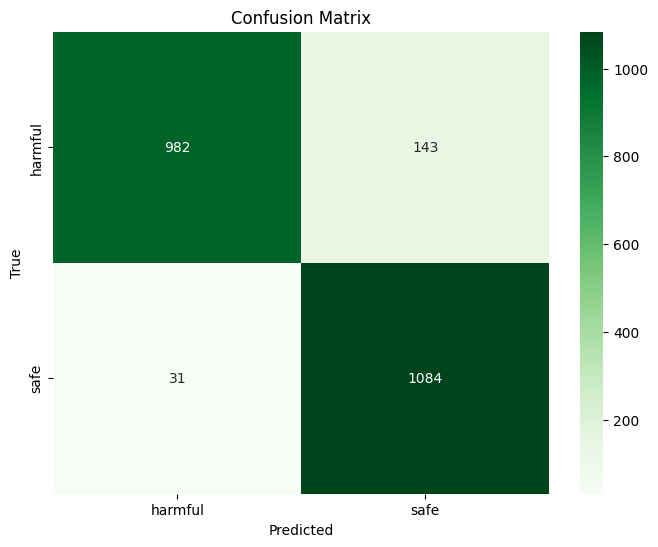

In [10]:

clf.fit(X_train_transformed, y_train)
predictions = cross_val_predict(clf, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       275
           1       0.92      0.95      0.93       285

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



In [12]:
# Predict on training and test data
y_train_pred = clf.predict(X_train_transformed)
y_test_pred = clf.predict(X_test_transformed)

# Print training accuracy
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train, y_train_pred):.4f}")

# Print test accuracy
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(y_test, y_test_pred):.4f}")

Metrics train:
	Accuracy score: 0.9996
Metrics test:
	Accuracy score: 0.9321


In [13]:
url = "https://www.exeter.ac.uk/"

url_transformed = vectorizer.transform([url])

# Predict using the trained model
decision_prediction = clf.predict(url_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

probs_url = clf.predict_proba(url_transformed)
print(probs_url)

# Output the prediction (safe or phishing)
print(f"URL: -> {decision_predicted_class[0]}")

text = "Someone just bought this item Ocean Golden Drop Earrings 2 Minutes ago FREE SHIPPING THIS WEEK ORDER OVER - $55 USD $ EUR € English Español Français 0 0 HOME CATEGORIES MEN'S WOMEN'S JEWELYR PERFUME BLOG HOT OFFERS Trending Item WOMEN'S LATEST FASHION SALE Startting at $ 20.00 SHOP NOW"
# text = "nur deeni"

text_transformed = vectorizer.transform([text]) 

# Predict using the trained RandomForest model
decision_prediction = clf.predict(text_transformed)

decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

probs_text = clf.predict_proba(text_transformed)
print(probs_text)

print(f"Text: -> {decision_predicted_class[0]}")

w_url = 0.3  # Weight for URL
w_text = 0.7  # Weight for Text

combined_prob_harmful = (w_url * probs_url[0][0]) + (w_text * probs_text[0][0])
combined_prob_safe = (w_url * probs_url[0][1]) + (w_text * probs_text[0][1])

final_prediction = 1 if combined_prob_safe > combined_prob_harmful else 0
final_predicted_class = label_encoder.inverse_transform([final_prediction])

print(f"Final Prediction: {final_predicted_class[0]}")

[[9.99999877e-01 1.22590885e-07]]
URL: -> harmful
[[0.44750725 0.55249275]]
Text: -> safe
Final Prediction: harmful


In [14]:
import joblib

joblib.dump(clf, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl") 
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [15]:
# -------------------------------- CODE BELOW IS TO EVALUATE MODEL PERFORMANCE & TESTING PURPOSES ------------------------------------

In [16]:
# import matplotlib.pyplot as plt
# from lime.lime_text import LimeTextExplainer

# # 1. Setup as before
# class_names = label_encoder.classes_.tolist()
# explainer = LimeTextExplainer(class_names=class_names)

# def predict_proba(texts):
#     transformed_texts = vectorizer.transform(texts)
#     return clf.predict_proba(transformed_texts)

# # 2. Your custom input text
# custom_text = """
# Congratulations! You've won a free iPhone. Click here to claim your prize.
# This is not a scam, just pay for shipping.
# """

# # 3. Explain instance
# exp = explainer.explain_instance(custom_text, predict_proba, num_features=10)

# # 4. Save explanation as an image
# fig = exp.as_pyplot_figure()
# fig.savefig("harmful text.png", dpi=300, bbox_inches='tight')
# plt.close(fig) 


In [17]:
# from lime.lime_text import LimeTextExplainer

# # Your label encoder class names
# class_names = label_encoder.classes_.tolist()

# # Create LIME Text Explainer
# explainer = LimeTextExplainer(class_names=class_names)

# # Your model’s probability prediction function
# def predict_proba(texts):
#     transformed_texts = vectorizer.transform(texts)
#     return clf.predict_proba(transformed_texts)

# # 🔹 CUSTOM TEXT INPUT (e.g., content scraped from a URL)
# custom_text = """
# Today is such a nice day out I cannot believe how sunny it is!
# """  # Replace with your actual content

# # 3. Explain instance
# exp = explainer.explain_instance(custom_text, predict_proba, num_features=10)

# # 4. Save explanation as an image
# fig = exp.as_pyplot_figure()
# fig.savefig("safe text.png", dpi=300, bbox_inches='tight')
# plt.close(fig) 

In [18]:
# from lime.lime_text import LimeTextExplainer

# # Your label encoder class names
# class_names = label_encoder.classes_.tolist()

# # Create LIME Text Explainer
# explainer = LimeTextExplainer(class_names=class_names)

# # Your model’s probability prediction function
# def predict_proba(texts):
#     transformed_texts = vectorizer.transform(texts)
#     return clf.predict_proba(transformed_texts)

# # 🔹 CUSTOM TEXT INPUT (e.g., content scraped from a URL)
# custom_text = """
# https://win-free-iphone-ClaimNow.com
# """  # Replace with your actual content

# # 3. Explain instance
# exp = explainer.explain_instance(custom_text, predict_proba, num_features=10)

# # 4. Save explanation as an image
# fig = exp.as_pyplot_figure()
# fig.savefig("harmful url.png", dpi=300, bbox_inches='tight')
# plt.close(fig)  


In [19]:
# from lime.lime_text import LimeTextExplainer

# # Your label encoder class names
# class_names = label_encoder.classes_.tolist()

# # Create LIME Text Explainer
# explainer = LimeTextExplainer(class_names=class_names)

# # Your model’s probability prediction function
# def predict_proba(texts):
#     transformed_texts = vectorizer.transform(texts)
#     return clf.predict_proba(transformed_texts)

# # 🔹 CUSTOM TEXT INPUT (e.g., content scraped from a URL)
# custom_text = """
# https://exetermosque.org.uk/
# """  # Replace with your actual content

# # 3. Explain instance
# exp = explainer.explain_instance(custom_text, predict_proba, num_features=10)

# # 4. Save explanation as an image
# fig = exp.as_pyplot_figure()
# fig.savefig("safe url.png", dpi=300, bbox_inches='tight')
# plt.close(fig)

In [ ]:
# from lime.lime_text import LimeTextExplainer

# # Your label encoder class names
# class_names = label_encoder.classes_.tolist()

# # Create LIME Text Explainer
# explainer = LimeTextExplainer(class_names=class_names)

# # Your model’s probability prediction function
# def predict_proba(texts):
#     transformed_texts = vectorizer.transform(texts)
#     return clf.predict_proba(transformed_texts)

# custom_text = "Someone just bought this item Ocean Golden Drop Earrings 2 Minutes ago FREE SHIPPING THIS WEEK ORDER OVER - $55 USD $ EUR € English Español Français 0 0 HOME CATEGORIES MEN'S WOMEN'S JEWELYR PERFUME BLOG HOT OFFERS Trending Item WOMEN'S LATEST FASHION SALE Startting at $ 20.00 SHOP NOW"

# # 3. Explain instance
# exp = explainer.explain_instance(custom_text, predict_proba, num_features=10)

# # 4. Save explanation as an image
# fig = exp.as_pyplot_figure()
# fig.savefig("test2.png", dpi=300, bbox_inches='tight')
# plt.close(fig)

In [21]:
# import glob
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report

# # Use glob to search for all CSV files that follow a naming convention.
# # For example, if all your datasets are named like 'new_dataset_60_40.csv', 'new_dataset_70_30.csv', etc.
# dataset_files = glob.glob("new_dataset_*.csv")  # adjust folder/path as needed

# # Loop through each dataset and perform training and evaluation
# for file_path in dataset_files:
#     print(f"Processing dataset: {file_path}")
    
#     # Read the dataset
#     df = pd.read_csv(file_path)
    
#     # Encode the labels
#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(df['Type'])
    
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)
    
#     # Initialize and fit TF-IDF vectorizer on training data
#     vectorizer = TfidfVectorizer()
#     X_train_transformed = vectorizer.fit_transform(X_train['Content'])
#     X_test_transformed = vectorizer.transform(X_test['Content'])
    
#     # Create a svm classfier
#     clf = SVC(kernel='linear', probability=True, class_weight='balanced')


#     # Train the model using training set
#     clf = SVC(probability=True)
#     clf.fit(X_train_transformed, y_train)

#     # Predict the response of dataset
#     y_pred = clf.predict(X_test_transformed)
    
#     # Print the classification report for the current dataset
#     report = classification_report(y_test, y_pred)
#     print("Classification Report:")
#     print(report)
#     print("-" * 40)
